## Importing required modules

In [1]:
from crtsh import crtshAPI ## search certificate /
import json
import time
import csv
from waybackpy import WaybackMachineCDXServerAPI ## search historical copies of website
import socket
import dns.resolver
import whois # query and response protocol that is often used for querying databases that store registered domain names.
import datetime
import pandas as pd
import os



def download_page(url):

    #TODO: Integrate shot-scraper CLI calls
#     print("current download_page url:",url)
    !shot-scraper {url}
#     print("download page completed")

    return 0

# Returns URL of latest archive page, timestamp of latest archive page
def download_archived_page(url):

    try:
        user_agent = "Mozilla/5.0 (Windows NT 5.1; rv:40.0) Gecko/20100101 Firefox/40.0"
        cdx_api = WaybackMachineCDXServerAPI(url, user_agent)

        newest = cdx_api.newest()

        return [newest.archive_url, newest.timestamp]

    except:
        print("download_archieved_page exception triggered")

        return ['', '']

# Returns Subject CN, SAN, Issuer Details, Issued Date, Earliest Issue Date of the first cert, Number of Certs
def download_cert(domain_name):

    if not os.path.exists("downloaded_certs"):
            os.makedirs("downloaded_certs")
        
    try:
        cert_json = crtshAPI().search(domain_name)
#         print(cert_json)
        
#         print(cert_json[len(cert_json)-1])
        
        
        with open("downloaded_certs/" + domain_name + ".json", "w") as outfile:
            json.dump(cert_json, outfile)

        return [cert_json[0]['common_name'], cert_json[0]['name_value'], cert_json[0]['issuer_name'], cert_json[0]['not_before'], len(cert_json)]

    except:

        print("download_cert exception triggered")
        return ['', '', '', '', '', '']



# Returns Unique CNs, Set of CNs, Unique Issuers, Set of Issuers, Unique AltName Values, Min of AltName Count, Max of AltName Count
def process_downloaded_cert(domain_name):

    try:
        # Opening JSON file
        f = open("downloaded_certs/" + domain_name + ".json")
        data = json.load(f)

        SubjectCN_set = set()
        Issuer_set = set()
        SerialNo_set = set()
        AltName_set = set()
        AltName_count_min = 99999
        AltName_count_max = 0

        if (len(data) == 0):
            return ['', '', '', '', '', '', '']


        for i in data:
            #print(i)

            SubjectCN_set.add(i["common_name"])
            Issuer_set.add(i["issuer_name"])
            SerialNo_set.add(i["serial_number"])
            AltName_set.add(i["name_value"])


            NumOfAltNamesInside = (i["name_value"].count("\n"))+1
            if (NumOfAltNamesInside < AltName_count_min):
                AltName_count_min = NumOfAltNamesInside

            if (NumOfAltNamesInside > AltName_count_max):
                AltName_count_max = NumOfAltNamesInside

        # Closing file
        f.close()

        return [len(SubjectCN_set), SubjectCN_set, len(Issuer_set), Issuer_set, len(AltName_set), AltName_count_min, AltName_count_max]

    except:
        print("process_downloaded_cert exception triggered")
        return ['', '', '', '', '', '', '']

# Returns CNAME, A IPs, Nameservers
def get_dns_info(domain_name):

    try:
        dns_info = socket.gethostbyname_ex(domain_name)
        print(dns_info)
        nameservers = dns.resolver.query(domain_name, 'NS')
        nameserver_list = [i.to_text() for i in nameservers]

        return [dns_info[1], dns_info[2], nameserver_list]

    except:

        print("get_dns_info exception triggered")
        return [[], [], []]


# Returns Registra, Name, Org, Created Date, Updated Date
def get_domain_whois_info(domain_name):

    if not os.path.exists("downloaded_whois"):
            os.makedirs("downloaded_whois")
            
    try:
        w = whois.whois(domain_name)
        with open("downloaded_whois/" + domain_name + ".txt", "w") as outfile:
            outfile.write(str(w.text))

        return [w.registrar, w.name, w.org, w.creation_date, w.updated_date]

    except:

        print("get_domain_whois_info() exception triggered")
        return ['', '', '', '', '']



with open('to_process.csv', newline='') as inputfile:
    with open('output_certVariations.csv', 'w', newline='') as outputfile:
        domain_list = csv.reader(inputfile, delimiter=',')
        output_writer = csv.writer(outputfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        counter = 0

        for row in domain_list:
            print("Processing: #" + str(counter) + " - " + row[0])
#             print("Printing Row: ", row)

            cert_list = download_cert(row[0])
            archivedpage_list = download_archived_page(row[0])
            dns_list = get_dns_info(row[0])
            whois_list = get_domain_whois_info(row[0])
            image = download_page(row[0])

            cert_variations = process_downloaded_cert(row[0])

#             output_writer.writerow(row + [datetime.datetime.now()] + cert_list + archivedpage_list + dns_list + whois_list)

            output_writer.writerow(row + [datetime.datetime.now()] + cert_variations)

            outputfile.flush()

            counter += 1
            #time.sleep(4)



print("completed")
exit(0)




ModuleNotFoundError: No module named 'crtsh'

## VT Call

In [6]:
API_KEY = '0d9fdb6e32d74b9d12e3d894309531838c3aabe8d66b049fd3a7976fbedf2c68'  #@param  {type: "string"}

r = requests.get("https://www.virustotal.com/api/v3/domains/www.amazon.com", headers={"x-apikey":API_KEY})



In [14]:
# from crtsh import crtshAPI ## search certificate /
import json
import time
import csv
# from waybackpy import WaybackMachineCDXServerAPI ## search historical copies of website
import socket
import dns.resolver
# import whois # query and response protocol that is often used for querying databases that store registered domain names.
import datetime
import pandas as pd
import os

def get_dns_info(domain_name):

    try:
        dns_info = socket.gethostbyname_ex(domain_name)
        print("dns_info:", dns_info)
        nameservers = dns.resolver.query(domain_name, 'NS')
        print("nameservers:", nameservers.response)
        print(type(nameservers))

        nameserver_list = [i.to_text() for i in nameservers]

        return [dns_info[1], dns_info[2], nameserver_list]

    except Exception as e:
        print(e)
        print("get_dns_info exception triggered")
        return [[], [], []]
    
    
get_dns_info("www.amazon.com")

dns_info: ('e15316.dsca.akamaiedge.net', ['www.amazon.com', 'tp.47cf2c8c9-frontier.amazon.com', 'www.amazon.com.edgekey.net'], ['119.56.1.86'])
nameservers: id 48620
opcode QUERY
rcode NOERROR
flags QR RD RA
;QUESTION
www.amazon.com. IN NS
;ANSWER
www.amazon.com. 276 IN CNAME tp.47cf2c8c9-frontier.amazon.com.
tp.47cf2c8c9-frontier.amazon.com. 58 IN CNAME d3ag4hukkh62yn.cloudfront.net.
d3ag4hukkh62yn.cloudfront.net. 1485 IN NS ns-2021.awsdns-60.co.uk.
d3ag4hukkh62yn.cloudfront.net. 1485 IN NS ns-130.awsdns-16.com.
d3ag4hukkh62yn.cloudfront.net. 1485 IN NS ns-1144.awsdns-15.org.
d3ag4hukkh62yn.cloudfront.net. 1485 IN NS ns-824.awsdns-39.net.
;AUTHORITY
;ADDITIONAL
<class 'dns.resolver.Answer'>


C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_21476\4224909885.py:18: DeprecationWarning: please use dns.resolver.resolve() instead
  nameservers = dns.resolver.query(domain_name, 'NS')


[['www.amazon.com',
  'tp.47cf2c8c9-frontier.amazon.com',
  'www.amazon.com.edgekey.net'],
 ['119.56.1.86'],
 ['ns-2021.awsdns-60.co.uk.',
  'ns-130.awsdns-16.com.',
  'ns-1144.awsdns-15.org.',
  'ns-824.awsdns-39.net.']]

In [5]:
from crtsh import crtshAPI ## search certificate /
import json
import time
import csv
from waybackpy import WaybackMachineCDXServerAPI ## search historical copies of website
import socket
import dns.resolver
import whois # query and response protocol that is often used for querying databases that store registered domain names.
import datetime
import pandas as pd
import os
import requests


API_KEY = '0d9fdb6e32d74b9d12e3d894309531838c3aabe8d66b049fd3a7976fbedf2c68'  #@param  {type: "string"}


## NOTE: ONLY STARTS FROM ROW 1 AND NOT 0 PLEASE EDIT

def process_domainlist(filename_to_process, columnIndex):
    
    with open(filename_to_process + ".csv", newline='') as inputfile:

        if not os.path.exists("downloaded_vtresponse"):
                os.makedirs("downloaded_vtresponse")

        with open(filename_to_process + "_tracker.csv", 'w', newline='') as outputfile:
            ip_list = csv.reader(inputfile, delimiter=',')
            output_writer = csv.writer(outputfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

            counter = 0

            for row in ip_list:

                if counter == 0:
                    output_writer.writerow(row + ["Time Run"])
                    outputfile.flush()
                    counter += 1
                    continue

                print("Processing: #" + str(counter) + " - " + row[columnIndex])

                #Get an IP address Report
#                 r = requests.get("https://www.virustotal.com/api/v3/ip_addresses/"+row[0], headers={"x-apikey":API_KEY})
                r = requests.get("https://www.virustotal.com/api/v3/domains/" + row[0], headers={"x-apikey":API_KEY})


                # TODO: Make generalised and incorporate timestamp in foldername
                now = datetime.datetime.now()
                dt_string = now.strftime("%d%m%Y")
                
                if not os.path.exists("downloaded_vtresponse/" + dt_string):
                    os.makedirs("downloaded_vtresponse/" + dt_string)
#                 with open("downloaded_vtresponse/" + row[columnIndex] +".json", "w") as outfile:
                with open("downloaded_vtresponse/" + dt_string + "/" + row[columnIndex] +".json", "w") as outfile:

                    outfile.write(r.text)

                output_writer.writerow(row + [datetime.datetime.now()])

                outputfile.flush()

                counter += 1
                time.sleep(16)
                
process_domainlist("to_process", 0)


Processing: #1 - www.facebook.com
Processing: #2 - www.amazon.com


## Presentation

In [10]:
from crtsh import crtshAPI ## search certificate /
import json
import time
import csv
from waybackpy import WaybackMachineCDXServerAPI ## search historical copies of website
import socket
import dns.resolver
import whois # query and response protocol that is often used for querying databases that store registered domain names.
import datetime
import pandas as pd
import os



def download_page(url):

    #TODO: Integrate shot-scraper CLI calls
#     print("current download_page url:",url)
    !shot-scraper {url}
#     print("download page completed")

    return 0

# Returns URL of latest archive page, timestamp of latest archive page
def download_archived_page(url):

    try:
        user_agent = "Mozilla/5.0 (Windows NT 5.1; rv:40.0) Gecko/20100101 Firefox/40.0"
        cdx_api = WaybackMachineCDXServerAPI(url, user_agent)

        newest = cdx_api.newest()

        return [newest.archive_url, newest.timestamp]

    except:
        print("download_archieved_page exception triggered")

        return ['', '']

# Returns Subject CN, SAN, Issuer Details, Issued Date, Earliest Issue Date of the first cert, Number of Certs
def download_cert(domain_name):

    if not os.path.exists("downloaded_certs"):
            os.makedirs("downloaded_certs")
        
    try:
        cert_json = crtshAPI().search(domain_name)
#         print(cert_json)
        
#         print(cert_json[len(cert_json)-1])
        
        
        with open("downloaded_certs/" + domain_name + ".json", "w") as outfile:
            json.dump(cert_json, outfile)

        return [cert_json[0]['common_name'], cert_json[0]['name_value'], cert_json[0]['issuer_name'], cert_json[0]['not_before'], len(cert_json)]

    except:

        print("download_cert exception triggered")
        return ['', '', '', '', '', '']



# Returns Unique CNs, Set of CNs, Unique Issuers, Set of Issuers, Unique AltName Values, Min of AltName Count, Max of AltName Count
def process_downloaded_cert(domain_name):

    try:
        # Opening JSON file
        f = open("downloaded_certs/" + domain_name + ".json")
        data = json.load(f)

        SubjectCN_set = set()
        Issuer_set = set()
        SerialNo_set = set()
        AltName_set = set()
        AltName_count_min = 99999
        AltName_count_max = 0

        if (len(data) == 0):
            return ['', '', '', '', '', '', '']


        for i in data:
            #print(i)

            SubjectCN_set.add(i["common_name"])
            Issuer_set.add(i["issuer_name"])
            SerialNo_set.add(i["serial_number"])
            AltName_set.add(i["name_value"])


            NumOfAltNamesInside = (i["name_value"].count("\n"))+1
            if (NumOfAltNamesInside < AltName_count_min):
                AltName_count_min = NumOfAltNamesInside

            if (NumOfAltNamesInside > AltName_count_max):
                AltName_count_max = NumOfAltNamesInside

        # Closing file
        f.close()

        return [len(SubjectCN_set), SubjectCN_set, len(Issuer_set), Issuer_set, len(AltName_set), AltName_count_min, AltName_count_max]

    except:
        print("process_downloaded_cert exception triggered")
        return ['', '', '', '', '', '', '']

# Returns CNAME, A IPs, Nameservers
def get_dns_info(domain_name):

    try:
        dns_info = socket.gethostbyname_ex(domain_name)
        print(dns_info)
        nameservers = dns.resolver.query(domain_name, 'NS')
        nameserver_list = [i.to_text() for i in nameservers]

        return [dns_info[1], dns_info[2], nameserver_list]

    except:

        print("get_dns_info exception triggered")
        return [[], [], []]


# Returns Registra, Name, Org, Created Date, Updated Date
def get_domain_whois_info(domain_name):

    if not os.path.exists("downloaded_whois"):
            os.makedirs("downloaded_whois")
            
    try:
        w = whois.whois(domain_name)
        with open("downloaded_whois/" + domain_name + ".txt", "w") as outfile:
            outfile.write(str(w.text))

        return [w.registrar, w.name, w.org, w.creation_date, w.updated_date]

    except:

        print("get_domain_whois_info() exception triggered")
        return ['', '', '', '', '']



In [5]:
get_dns_info("www.amazon.com")

('d3ag4hukkh62yn.cloudfront.net', ['www.amazon.com', 'tp.47cf2c8c9-frontier.amazon.com'], ['13.33.37.125'])


C:\Users\puddi\AppData\Local\Temp\ipykernel_7956\2498064822.py:115: DeprecationWarning: please use dns.resolver.resolve() instead
  nameservers = dns.resolver.query(domain_name, 'NS')


[['www.amazon.com', 'tp.47cf2c8c9-frontier.amazon.com'],
 ['13.33.37.125'],
 ['ns-130.awsdns-16.com.',
  'ns-2021.awsdns-60.co.uk.',
  'ns-824.awsdns-39.net.',
  'ns-1144.awsdns-15.org.']]

In [6]:
get_dns_info("apple.com")

('apple.com', [], ['17.253.144.10'])


C:\Users\puddi\AppData\Local\Temp\ipykernel_7956\2498064822.py:115: DeprecationWarning: please use dns.resolver.resolve() instead
  nameservers = dns.resolver.query(domain_name, 'NS')


[[],
 ['17.253.144.10'],
 ['c.ns.apple.com.', 'd.ns.apple.com.', 'b.ns.apple.com.', 'a.ns.apple.com.']]

In [8]:
get_domain_whois_info("www.apple.com")

['CSC CORPORATE DOMAINS, INC.',
 'Domain Administrator',
 'Apple Inc.',
 [datetime.datetime(1987, 2, 19, 5, 0), datetime.datetime(1987, 2, 19, 0, 0)],
 [datetime.datetime(2023, 2, 16, 6, 14, 38),
  datetime.datetime(2023, 2, 16, 1, 14, 38)]]

In [14]:
get_domain_whois_info("13.33.37.125")

get_domain_whois_info() exception triggered
No match for "R.CLOUDFRONT.NET".
>>> Last update of whois database: 2023-02-20T06:18:34Z <<<

NOTICE: The expiration date displayed in this record is the date the
registrar's sponsorship of the domain name registration in the registry is
currently set to expire. This date does not necessarily reflect the expiration
date of the domain name registrant's agreement with the sponsoring
registrar.  Users may consult the sponsoring registrar's Whois database to
view the registrar's reported date of expiration for this registration.

TERMS OF USE: You are not authorized to access or query our Whois
database through the use of electronic processes that are high-volume and
automated except as reasonably necessary to register domain names or
modify existing registrations; the Data in VeriSign Global Registry
Services' ("VeriSign") Whois database is provided by VeriSign for
information purposes only, and to assist persons in obtaining information
about o

['', '', '', '', '']

In [11]:
download_archived_page("www.amazon.com")

['https://web.archive.org/web/20230417225253/https://www.amazon.com/',
 '20230417225253']

In [5]:
# import json
# import time
# import csv
# from waybackpy import WaybackMachineCDXServerAPI ## search historical copies of website
# import socket
# import dns.resolver
# import whois # query and response protocol that is often used for querying databases that store registered domain names.
# import datetime
# import pandas as pd
# import os



def download_page(url):

    #TODO: Integrate shot-scraper CLI calls
#     print("current download_page url:",url)
    !shot-scraper {url}
#     print("download page completed")

    return 0

download_page('1.1.1.1')

'shot-scraper' is not recognized as an internal or external command,
operable program or batch file.


0

In [3]:
!shot-scraper 1.1.1.1 --wait 2000

Screenshot of 'http://1.1.1.1' written to '1-1-1-1.2.png'


In [4]:
!shot-scraper 101.32.113.139 --wait 2000

Traceback (most recent call last):
  File "C:\Users\puddi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\puddi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\puddi\anaconda3\Scripts\shot-scraper.exe\__main__.py", line 7, in <module>
  File "C:\Users\puddi\anaconda3\lib\site-packages\click\core.py", line 1128, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\puddi\anaconda3\lib\site-packages\click\core.py", line 1053, in main
    rv = self.invoke(ctx)
  File "C:\Users\puddi\anaconda3\lib\site-packages\click\core.py", line 1659, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "C:\Users\puddi\anaconda3\lib\site-packages\click\core.py", line 1395, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "C:\Users\puddi\anaconda3\lib\site-packages\click\core.py", line 754, in invoke
    return __callback(*args, **kw

In [3]:
!shot-scraper www.amazon.com

Screenshot of 'http://www.amazon.com' written to 'www-amazon-com.2.png'


In [12]:
!curl --head amazon.com

HTTP/1.1 301 Moved Permanently
Server: Server
Date: Thu, 16 Mar 2023 09:47:47 GMT
Content-Type: text/html
Content-Length: 163
Connection: keep-alive
Location: https://amazon.com/



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   163    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [16]:
!curl -i https://1.1.1.1

HTTP/1.1 200 OK
Date: Thu, 16 Mar 2023 09:50:37 GMT
Content-Type: text/html
Transfer-Encoding: chunked
Connection: keep-alive
Report-To: {"endpoints":[{"url":"https:\/\/a.nel.cloudflare.com\/report\/v3?s=9eI6QcVTYrc8MOs36sTjuYV3tcWOwJ2%2BtZkVDvECivVuM5WNwLW55rBait7NDUTvYk3k2d56%2BI6UTRsaiTd2CKwVvmEcRuDOG8yTfOsFlF%2Bsn5jeg%2Bw%2F%2FgA%3D"}],"group":"cf-nel","max_age":604800}
NEL: {"report_to":"cf-nel","max_age":604800}
Last-Modified: Thu, 04 Aug 2022 19:10:01 GMT
Strict-Transport-Security: max-age=31536000
Served-In-Seconds: 0.002
Cache-Control: public, max-age=14400
CF-Cache-Status: HIT
Age: 505
Expires: Thu, 16 Mar 2023 13:50:37 GMT
Set-Cookie: __cf_bm=j_05X6RAplug5NL2.WHA_.XdJrZId9h1xdQ6shtF.y8-1678960237-0-AXrNOeJXu/DnOLA0gsKLvudIasjvzaLRif9vNGsZNG72dAQwhjwTA3Cvk8JnVsuR5h1FjkbTfY71zu80AwlPxWo=; path=/; expires=Thu, 16-Mar-23 10:20:37 GMT; domain=.every1dns.com; HttpOnly; Secure; SameSite=None
Server: cloudflare
CF-RAY: 7a8c17ccaa7d44b2-SIN
alt-svc: h3=":443"; ma=86400, h3-29=":443";

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 54361    0 54361    0     0   689k      0 --:--:-- --:--:-- --:--:--  698k


HTTP/1.1 200 OK
Date: Mon, 20 Mar 2023 17:12:23 GMT
Content-Type: application/javascript
Transfer-Encoding: chunked
Connection: keep-alive
Report-To: {"endpoints":[{"url":"https:\/\/a.nel.cloudflare.com\/report\/v3?s=uccP7ULA8c1FY9G8gQQpKCbz%2FiZwhK8Bq6JDABq1ReEKw5ZhaA2uc255WWASDe5p7KnEhqZjIt4YOVuLLaH1PN1PYCzD%2FFmkf1d0gol9rarwF7cJaJrVOrQ%3D"}],"group":"cf-nel","max_age":604800}
NEL: {"report_to":"cf-nel","max_age":604800}
Last-Modified: Thu, 04 Aug 2022 19:10:05 GMT
ETag: W/"9ae9817ea2aac2b6c359f31c8e9150a7"
Strict-Transport-Security: max-age=31536000
Served-In-Seconds: 0.003
Cache-Control: public, max-age=14400
CF-Cache-Status: HIT
Age: 520
Expires: Mon, 20 Mar 2023 21:12:23 GMT
Set-Cookie: __cf_bm=64S4BHhIfs6uV9mWbBP_LaUGi0KyTR80uD3ARFlSSk8-1679332343-0-Acmt7+hkrsJd/3bXNtpcayiZWOmtQ01ehTH2cOUDkuYQpT0U6m8i99a1hQtvdS81OObgOLmGUwQdxxYPTZTeXNw=; path=/; expires=Mon, 20-Mar-23 17:42:23 GMT; domain=.every1dns.com; HttpOnly; Secure; SameSite=None
Server: cloudflare
CF-RAY: 7aaf9467eb534953
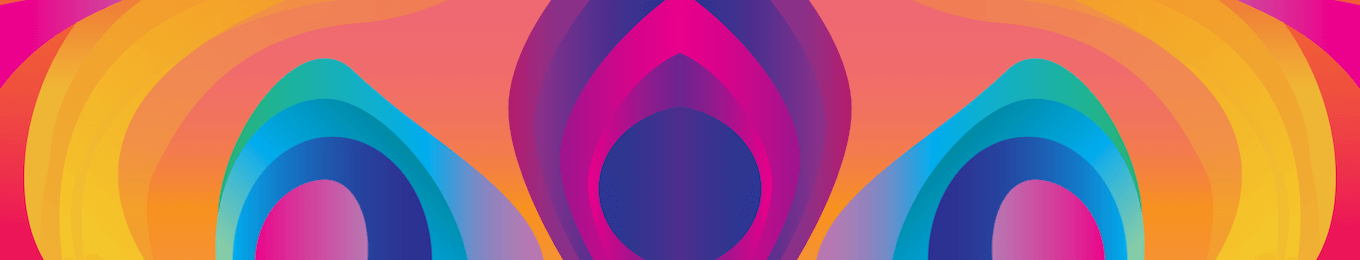
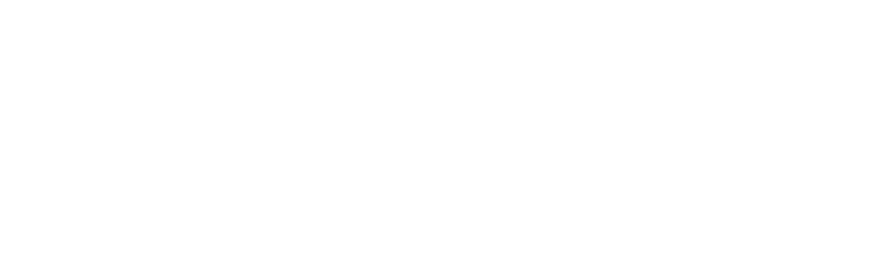

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 94449    0 94449    0     0  1425k      0 --:--:-- --:--:-- --:--:-- 1441k


In [1]:
!curl -i https://1.1.1.1/site-16bcc13e690cc771698c.js